# Single Tarso (Pastas) model for one Wiertsema series

This notebook creates a minimal Pastas model (Tarso-style) using the Wiertsema timeseries
`output_data/only_csv_wiertsema/87074-1 MB111PB01 B_PU0181+2_BIKR_GMW_PB1_F-5.95_1.csv` as the observed head.

Steps:
1. Find the repository root using relative paths.
2. Load the CSV and pick the first numeric column as the observed series.
3. Try to load a precipitation stress from `input_stressors/prec_station_249.csv` (if present), otherwise create a small synthetic stress.
4. Build a tiny Pastas model with a Gamma response and fit it.

Run the cells below in order.

In [20]:
# Cell 2: setup imports and repo discovery
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pastas as ps


warnings.filterwarnings('ignore')

# find repo root
repo_root = Path.cwd()
for candidate in [repo_root] + list(repo_root.parents):
    if (candidate / 'pyproject.toml').exists() or (candidate / '.git').exists():
        repo_root = candidate
        break
print('Repo root:', repo_root)

wiertsema_dir = repo_root / 'output_data' / 'only_csv_wiertsema'
fugro_dir = repo_root / 'output_data' / 'only_csv_fugro'    
singles_dir = repo_root / 'output_data' / 'only_csv_singles'
stressor_dir = repo_root / 'input_stressors'
out_fig = repo_root / 'output_data' / 'figures'
out_fig.mkdir(parents=True, exist_ok=True)

Repo root: d:\Users\jvanruitenbeek\data_validation


In [21]:
import pandas as pd
from pathlib import Path

# Name of the directory containing single well data
name_model = "86349-1 HB011PB01 HB_BE0147+68_BUKR_GMW_PB1_F-247"

# --- Load and clean the head data ---------------------------------------------
df_head = pd.read_csv(
    Path(wiertsema_dir) / (name_model + ".csv"),
    index_col=0,
    parse_dates=True,
    encoding="utf-8-sig"
)


# df_head = pd.read_csv(
#     Path(wiertsema_dir) / (name_model + ".csv"),
#     usecols=["DateTime","head"],
#     parse_dates=["DateTime"],
#     dayfirst=True,
#     index_col="DateTime",
#     encoding="utf-8-sig"
# )

# Take first numeric column and rename to 'head'
head = df_head.select_dtypes("number").iloc[:, 0].rename("head")

# Crop to first and last valid (non-NaN) data points
df_head = head.loc[head.first_valid_index(): head.last_valid_index()]


df_prec = pd.read_csv(Path(stressor_dir) / "prec_station_249_2020.csv",
                   index_col=0, parse_dates=True)["Precipitation"]

df_evap = pd.read_csv(Path(stressor_dir) / "evap_station_249_2020.csv",
                   index_col=0, parse_dates=True)["ET"]

df_prec_long = pd.read_csv(Path(stressor_dir) / "precipitation_long_clean.csv",
                   index_col=0, parse_dates=True)["precipitation"]

df_evap_long = pd.read_csv(Path(stressor_dir) / "evaporation_long_clean.csv",
                   index_col=0, parse_dates=True)["evaporation"]

In [22]:
# dupes_mask = df_head.index.duplicated(keep=False)
# dupes = df_head.loc[dupes_mask].sort_index()
# dupes

In [23]:
print(df_head.head())

Time
2024-08-26 14:00:00   -1.198
2024-08-26 15:00:00   -1.186
2024-08-26 16:00:00   -1.184
2024-08-26 17:00:00   -1.187
2024-08-26 18:00:00   -1.187
Name: head, dtype: float64


In [24]:
df_head.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 9691 entries, 2024-08-26 14:00:00 to 2025-10-05 23:00:02
Series name: head
Non-Null Count  Dtype  
--------------  -----  
9691 non-null   float64
dtypes: float64(1)
memory usage: 151.4 KB


<Axes: xlabel='Time'>

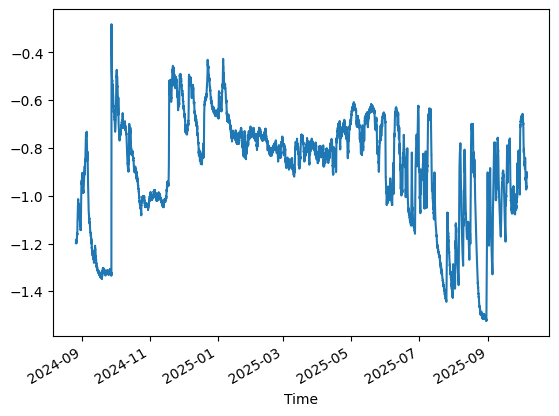

In [25]:
df_head.plot()

In [26]:
# start_slice_date = "2023-02-1"
# end_slice_date = "2024-12-19"

# # # Slicing the data 
# df_head_slice = df_head.loc[start_slice_date:end_slice_date]

# #Modifying df_head to only include data between start_slice_date and end_slice_date
# df_slice.info()
# df_head.sort_index().resample("D").mean()

# #Converting values to NaN
# df_head_clean = df_head.where(df_head >= -450)

# # Converting to m and plotting
# df_head_m = df_head / 100
# df_head_m.plot()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2101 entries, 2020-01-01 to 2025-10-01
Series name: Precipitation
Non-Null Count  Dtype  
--------------  -----  
2101 non-null   float64
dtypes: float64(1)
memory usage: 32.8 KB


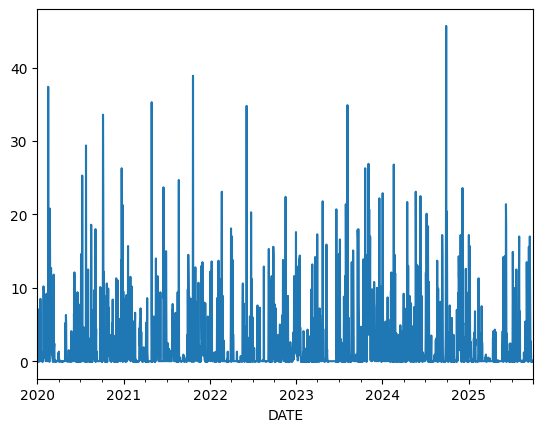

In [27]:
df_prec.plot()
df_prec.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2101 entries, 2020-01-01 to 2025-10-01
Series name: ET
Non-Null Count  Dtype  
--------------  -----  
2101 non-null   float64
dtypes: float64(1)
memory usage: 32.8 KB


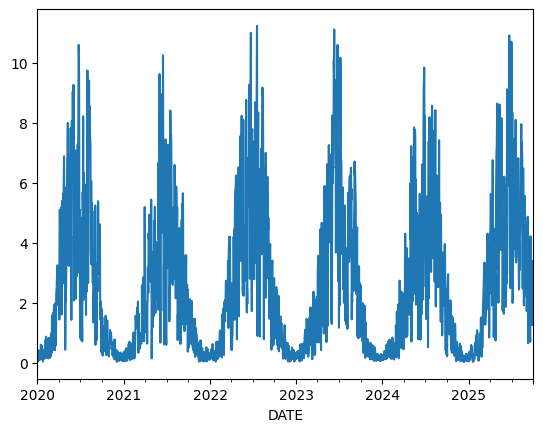

In [28]:
df_evap.plot()
df_evap.info()

Fit report non_linear_model            Fit Statistics
nfev    116                    EVP              57.52
nobs    406                    R2                0.58
noise   False                  RMSE              0.15
tmin    2024-08-26 14:00:00    AICc          -1524.92
tmax    2025-10-05 23:00:02    BIC           -1477.63
freq    D                      Obj               4.46
warmup  3650 days 00:00:00     ___                   
solver  LeastSquares           Interp.            Yes

Parameters (12 optimized)
                           optimal     initial   vary
recharge_A            3.332656e+00    0.283971   True
recharge_alpha        1.008453e-02    0.100000   True
recharge_a1           3.786907e+01   10.000000   True
recharge_a2           7.043322e+01   10.000000   True
recharge_srmax        8.117395e+01  250.000000   True
recharge_lp           2.500000e-01    0.250000  False
recharge_ks           1.749398e+03  100.000000   True
recharge_gamma        1.492323e+01    2.000000   True
r

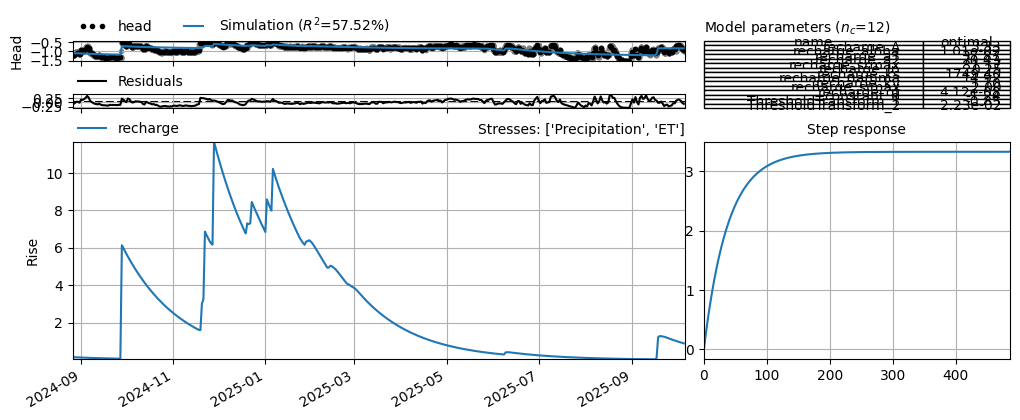

In [29]:
# --- Non-linear recharge with a XXXX response --------------------------------
ml = ps.Model(df_head, name="non_linear_model")   # keep default constant enabled

# Picking a recharge model with a non-linear recharge
rch = ps.rch.FlexModel(gw_uptake=True)  # non-linear recharge (can also try Berendrecht())

# Define the stressmodel with a Gamma response function
sm  = ps.RechargeModel(
    df_prec,
    df_evap,
    recharge=rch,
    rfunc=ps.DoubleExponential(),
    name="recharge"      # <- Gamma response function
)

# Adding the stressmodel to the model
ml.add_stressmodel(sm)

# --- Constrain time scales & evap factor --------------------------------------
ml.set_parameter("recharge_a1", pmin=0.5,  pmax=500.0)   # days
ml.set_parameter("recharge_a2", pmin=10.0, pmax=500.0)  # days

# Adding thresholdt ransform
ml.add_transform(ps.ThresholdTransform())

# --- Solve & quicklook --------------------------------------------------------
ml.solve(report=True)
ml.plots.results(figsize=(10,4))                 # overview plot

# Saving model to file
ml.to_file(name_model + "_non_linear_model.pas") 

In [30]:
ml.get_response_tmax("recharge", cutoff=0.95)

np.float64(210.99905557385807)

2024-08-27   -1.095505
2024-08-28   -1.099248
2024-08-29   -1.102894
2024-08-30   -1.106447
2024-08-31   -1.109909
Freq: D, Name: Simulated, dtype: float64
Time
2024-08-26 14:00:00   -1.198
2024-08-26 15:00:00   -1.186
2024-08-26 16:00:00   -1.184
2024-08-26 17:00:00   -1.187
2024-08-26 18:00:00   -1.187
Name: head, dtype: float64


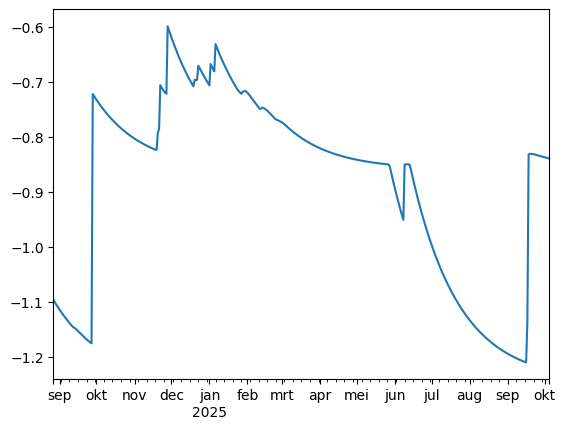

In [31]:
# exact window used in the last solve
tmin = ml.settings["tmin"]
tmax = ml.settings["tmax"]

# simulated heads (includes constant/transforms if present)
simulated_series = ml.simulate(tmin=tmin, tmax=tmax).rename("Simulated")
simulated_series.plot()

# Print first few rows of the simulated series
print(simulated_series.head())

# Print first few rows of observed data
print(df_head.head())

In [32]:
ml.get_response_tmax("recharge", cutoff=0.95)

np.float64(210.99905557385807)

In [34]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import plotly.io as pio
# pio.renderers.default = "browser"  # optional

# --- Prepare series -----------------------------------------------------------
# Observed (hourly/irregular) and simulated (daily)
#obs_raw = (df_head.select_dtypes("number").iloc[:, 0] if hasattr(df_head, "select_dtypes") else df_head).rename("Observed (raw)")
obs_raw = df_head
sim = simulated_series.rename("Simulated (daily)")

# Meteo (usually daily)
prec = df_prec.rename("Precipitation")
evap = df_evap.rename("Evaporation")

# Optional: drop completely empty rows to avoid warnings when plotting
# prec, evap = prec.dropna(), evap.dropna()
# obs_raw, sim = obs_raw.dropna(), sim.dropna()

# --- Build figure with secondary y-axis --------------------------------------
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Heads (left y-axis)
fig.add_trace(go.Scatter(x=obs_raw.index, y=obs_raw.values, mode="lines", name=obs_raw.name), secondary_y=False)
fig.add_trace(go.Scatter(x=sim.index,     y=sim.values,     mode="lines", name=sim.name),     secondary_y=False)

# Meteo on secondary axis (right y-axis)
fig.add_trace(
    go.Bar(x=prec.index, y=prec.values, name=prec.name, opacity=0.4),
    secondary_y=True
)
fig.add_trace(
    go.Bar(x=evap.index, y=evap.values, name=evap.name, opacity=0.4),
    secondary_y=True
)

# --- Layout -------------------------------------------------------------------
fig.update_layout(
    title="Observed (raw) vs Simulated Head with Precipitation & Evaporation",
    hovermode="x unified",
    bargap=0.0,  # bars touch day-to-day
    xaxis=dict(
        type="date",
        rangeslider=dict(visible=False),
        rangeselector=dict(buttons=[
            dict(count=1,  label="1m", step="month", stepmode="backward"),
            dict(count=6,  label="6m", step="month", stepmode="backward"),
            dict(count=1,  label="1y", step="year",  stepmode="backward"),
            dict(count=5,  label="5y", step="year",  stepmode="backward"),
            dict(step="all"),
        ])
    ),
    legend=dict(x=1, y=1, xanchor="right", yanchor="top"),  # top-right
)

fig.update_yaxes(title_text="Head", secondary_y=False)
fig.update_yaxes(title_text="P / ET", secondary_y=True)

fig.show()


In [ ]:
# # 1) Load trained model and grab solved params (in case you need them later)
# ml_long = ps.io.load("WG_BE0049_00_BIKR_GMW_PB1_F-227_non_linear_model.pas")
# p_solved = ml_long.get_parameters()  # optional
# p_solved

In [ ]:

# # 2) Replace the existing RechargeModel with LONG series (prec, evap)
# old_sm = ml_long.stressmodels["recharge"]
# ml_long.del_stressmodel("recharge")

# new_sm = ps.RechargeModel(
#     df_prec,                  # <-- precipitation (was evap twice)
#     df_evap,                  # <-- evaporation
#     recharge=old_sm.recharge,      # e.g., ps.rch.Linear()
#     rfunc=old_sm.rfunc,            # e.g., ps.Exponential()
#     name=old_sm.name               # keep the same name so params line up
# )
# ml_long.add_stressmodel(new_sm)

# # 4) Because adding a transform adds parameters, do a quick solve to estimate them
# #    (otherwise your old parameter vector will no longer match the model structure)
# ml_long.solve(report=True)

# # 5) Simulate over the long period
# simulated_head_long = ml_long.simulate(
#     tmin="2022", tmax="2025", freq="D", return_warmup=False
# )

# # (optional) save or store
# # simulated_head_long.to_csv("simulated_head_long.csv", header=["head_sim"])
# # df_series[loc] = simulated_head_long

In [ ]:
old_sm.recharge

In [ ]:
old_sm.rfunc

In [ ]:
print(old_sm.recharge)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 0) Ensure it's a Series with a DatetimeIndex -----------------------------
s = simulated_head_long.copy()
if isinstance(s, pd.DataFrame) and s.shape[1] == 1:
    s = s.iloc[:, 0]
s.index = pd.to_datetime(s.index)
s = s.sort_index()

print("Type:", type(s))
print("Value dtype:", s.dtype)
print("Index dtype:", s.index.dtype)
print(f"Date range: {s.index.min()} → {s.index.max()}")
print(f"Length: {len(s):,}   NaNs: {s.isna().sum():,}")
try:
    print("Inferred freq:", pd.infer_freq(s.index))
except Exception:
    print("Inferred freq: (could not infer)")

print("\nDescriptive stats:")
print(s.describe())

# --- 1) Quick time series plot ------------------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(s.index, s.values, label="Simulated head")
plt.title("Simulated Head (long series)")
plt.xlabel("Date")
plt.ylabel("Head")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from pathlib import Path
import pandas as pd

# Ensure we have a 1D Series with a DatetimeIndex
sim = simulated_head_long
if isinstance(sim, pd.DataFrame):
    if sim.shape[1] == 1:
        sim = sim.iloc[:, 0]
    else:
        raise ValueError("simulated_head_long has multiple columns; select one first.")
sim = sim.copy()
sim.index = pd.to_datetime(sim.index)
sim.name = sim.name or "head_sim"

# Save to CSV
out_path = Path("simulated_head_long.csv")
sim.to_frame().to_csv(out_path, index=True, index_label="timestamp", float_format="%.6f")

print(f"Saved {len(sim):,} rows to {out_path.resolve()}")